<a href="https://colab.research.google.com/github/neoncoip/practice/blob/main/An%C3%A1lisis_explotario_(EDA)_y_contrucci%C3%B3n_de_modelo_predictivo_XGB_sobre_Telco_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA)

## Importación módulos y dataset

In [ ]:
#Upgrade matplotlib (Por defecto se intala la versión 3.2.2, necesito una función que se implementó desde la versión 3.4 en adelante.)
!pip install matplotlib --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Instalación de adjusText para que no se superpongan los textos de los modelos en el scatterplot.
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importación módulos análisis exploratorio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importación librerías para modelo predictivo
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, average_precision_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from adjustText import adjust_text
import time

In [ ]:
#Importación dataset desde github 
#Obtenido de Kaggle https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
url='https://raw.githubusercontent.com/neoncoip/practice/main/Telco_customer_churn.csv'
tcc = pd.read_csv(url, sep=';')
pd.options.display.max_columns = None
display(tcc.head())

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783","33,964131","-118,272783",Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742","34,059281","-118,307420",Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953","34,048013","-118,293953",Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"99,65","820,5",Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709","34,062125","-118,315709",Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,"104,8","3046,05",Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293","34,039224","-118,266293",Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),"103,7","5036,3",Yes,1,89,5340,Competitor had better devices


## Inspección del dataset

In [ ]:
#Inspección del dataset
display(tcc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         7043 non-null   object
 1   Count              7043 non-null   int64 
 2   Country            7043 non-null   object
 3   State              7043 non-null   object
 4   City               7043 non-null   object
 5   Zip Code           7043 non-null   int64 
 6   Lat Long           7043 non-null   object
 7   Latitude           7043 non-null   object
 8   Longitude          7043 non-null   object
 9   Gender             7043 non-null   object
 10  Senior Citizen     7043 non-null   object
 11  Partner            7043 non-null   object
 12  Dependents         7043 non-null   object
 13  Tenure Months      7043 non-null   int64 
 14  Phone Service      7043 non-null   object
 15  Multiple Lines     7043 non-null   object
 16  Internet Service   7043 non-null   object


None

In [ ]:
tcc['Churn Value'].groupby(by=pd.isnull(tcc['Churn Reason'])).sum()

Churn Reason
False    1869
True        0
Name: Churn Value, dtype: int64

>* Tenemos 33 campos, de los cuales 10 son númericos aunque 4 de ellos son reconocidos como object ('Latitude', 'Longitude', 'Monthly Charges' y 'Total Charges').<br>
>* Un sólo campo, 'Churn Reason', tiene datos nulos lógicamente en los clientes sin churn.

 --- 

In [ ]:
#Definimos una lista con las columnas a convetir a número
cols = ['Longitude', 'Latitude', 'Monthly Charges', 'Total Charges']

#Reemplazamos la coma por punto y el espacio por nada y convertimos a número
tcc[cols] = tcc[cols].apply(lambda x: x.str.replace(',', '.')).apply(lambda x: x.str.replace(' ', '0')).apply(lambda x: pd.to_numeric(x))
print(tcc[cols].info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longitude        7043 non-null   float64
 1   Latitude         7043 non-null   float64
 2   Monthly Charges  7043 non-null   float64
 3   Total Charges    7043 non-null   float64
dtypes: float64(4)
memory usage: 220.2 KB
None


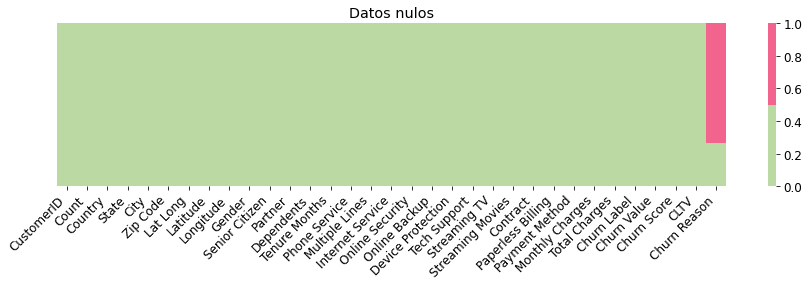

In [ ]:
plt.figure(figsize=(15,3))
gra = sns.heatmap(tcc.sort_values(by=['Churn Value']).isna(), cmap=(['#bbd9a3','#f2638e']))
gra.set_title('Datos nulos')
gra.tick_params(left=False, labelleft=False)
plt.xticks(rotation=45, horizontalalignment='right')
gra.set_ylabel(None)
plt.show()

### Comprendiendo los campos

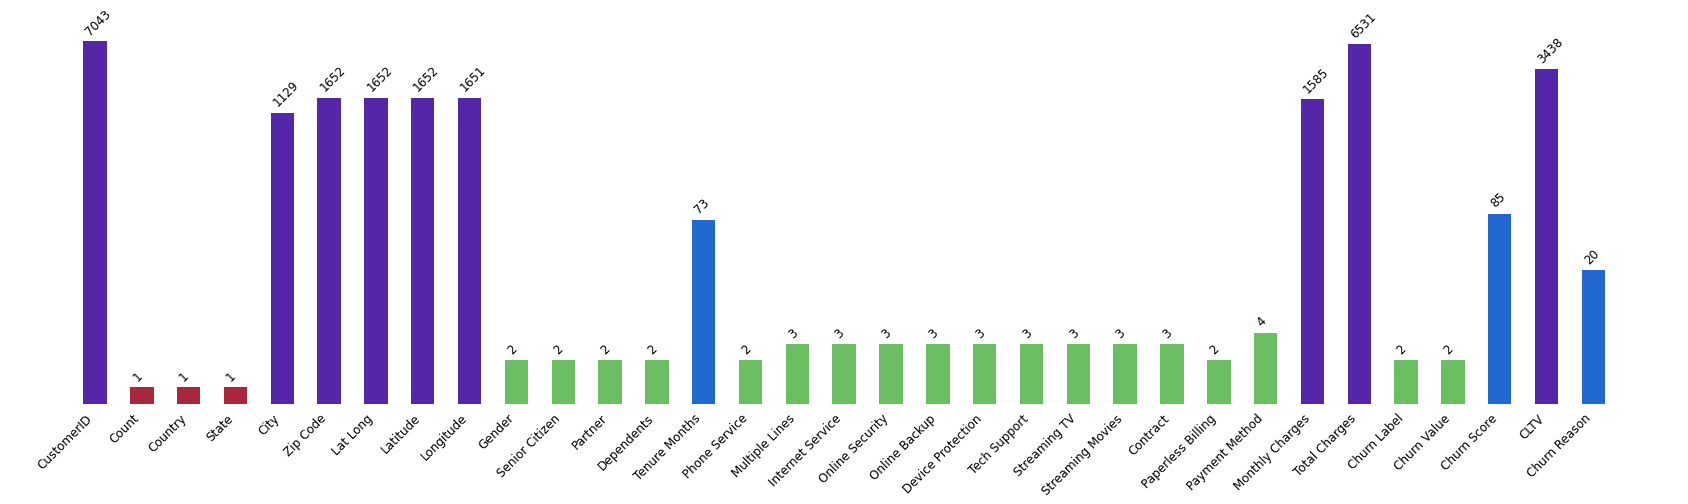

In [ ]:
#Contruimos una lista que cuente los valóres únicos para cada campo
nuni_co = []
for col in tcc.columns:
  nuni_co.append(tcc[col].nunique())
  
#Definimos colores y rangos para destacar el gráfico que vamos a construir con los datos del paso anterior
col = ['#a8273c', '#6bbf62', '#2168d1', '#5427a8']
lev = [1, 4, 100]
color_profile = [{i<=lev[0]:col[0], lev[0]<i<=lev[1]:col[1], lev[1]<i<=lev[2]:col[2], lev[2]<i:col[3]}[True] for i in nuni_co]      

#Graficamos
fig, ax = plt.subplots(figsize=(30, 7))
bars = ax.bar(tcc.columns, nuni_co, width=.5, color=color_profile)

#Etiquetamos las barras con los valores (A la usanza de Matplotlib <3.4), limpiamos y ajustamos gráfico.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), 1.2*yval, yval, rotation=45)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yscale('log')
ax.tick_params(bottom=False, left=False, labelleft=False, labelbottom=True)
sns.despine(fig=fig, ax=ax, top=True, right=True, left=True, bottom=True)
plt.minorticks_off()
plt.show()

### Definición:

Obtenido de: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

*   **CustomerID:** A unique ID that identifies each customer.
*   **Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
*   **Country:** The country of the customer’s primary residence.
*   **State:** The state of the customer’s primary residence.
*   **City:** The city of the customer’s primary residence.
*   **Zip Code:** The zip code of the customer’s primary residence.
*   **Lat Long:** The combined latitude and longitude of the customer’s primary residence.
*   **Latitude:** The latitude of the customer’s primary residence.
*   **Longitude**: The longitude of the customer’s primary residence
*   **Gender:** The customer’s gender: Male, Female
*   **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No.
*   **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
*   **Tenure Months:** Indicates the total amount of months that the customer has been with the company.
*   **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No.
*   **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No.
*   **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
*   **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.
*   **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.
*   **Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No.
*   **Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No.
*   **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
*   **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
*   **Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
*   **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No.
*   **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
*   **Monthly Charges:** Indicates the customer’s current total monthly charge for all their services from the company.
*   **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.
*   **Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
*   **Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
*   **Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
*   **CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
*   **Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

#### Conclusiones preliminares 

>**CustomerID** pareciera no ser un campo de utilidad pero veremos si los existe algún patrón en los números y letras que sirvan para el modelo predictivo.<br>
>**Count** este campo lo eliminaremos ya que es uniforme y no aporta información.<br>
>**Country:** presenta un único valor "United States", lo eliminaremos en la creación del modelo predictivo.<br>
>**State:** presenta un único valor "California", lo eliminaremos en la creación del modelo predictivo.<br>
>**Lat Long:** Contiene información redundante de 'Latitude' y 'Longitude', lo eliminaremos en la creación del modelo predictivo.<br>
>**Total Charges:** Este campo podría ser redunte con 'Tenure Months' y 'Monthly Charges'. Haremos un análisis dedicado.<br> 
>**Churn Label:** Redundante con 'Churn Value', lo eliminaremos para el modelo predictivo.<br>
>**Churn Score:** No lo usaremos en el modelo predictivo.<br>
>**CLTV:** No lo usaremos en el modelo predictivo.<br>
>**Churn Reason:** Inmediatamente ofrecerá insights para cuantificar y ponderar los motivos.

---

In [ ]:
#Veamos algunas estadísticas de los campos numéricos.
display(tcc.describe())

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


#### Más conclusiones preliminares:

>*   El 27% de los registros tiene churn positivo.
>*   Ya habíamos advertido que 'Count' sólo tiene el mismo valor para todos los registros.
>*   Los valores de 'Tenure Months' prensentan una media y mediana similares y los valores min y max son razonables, ninguna alarma para este campo.

---






## Análisis univariado

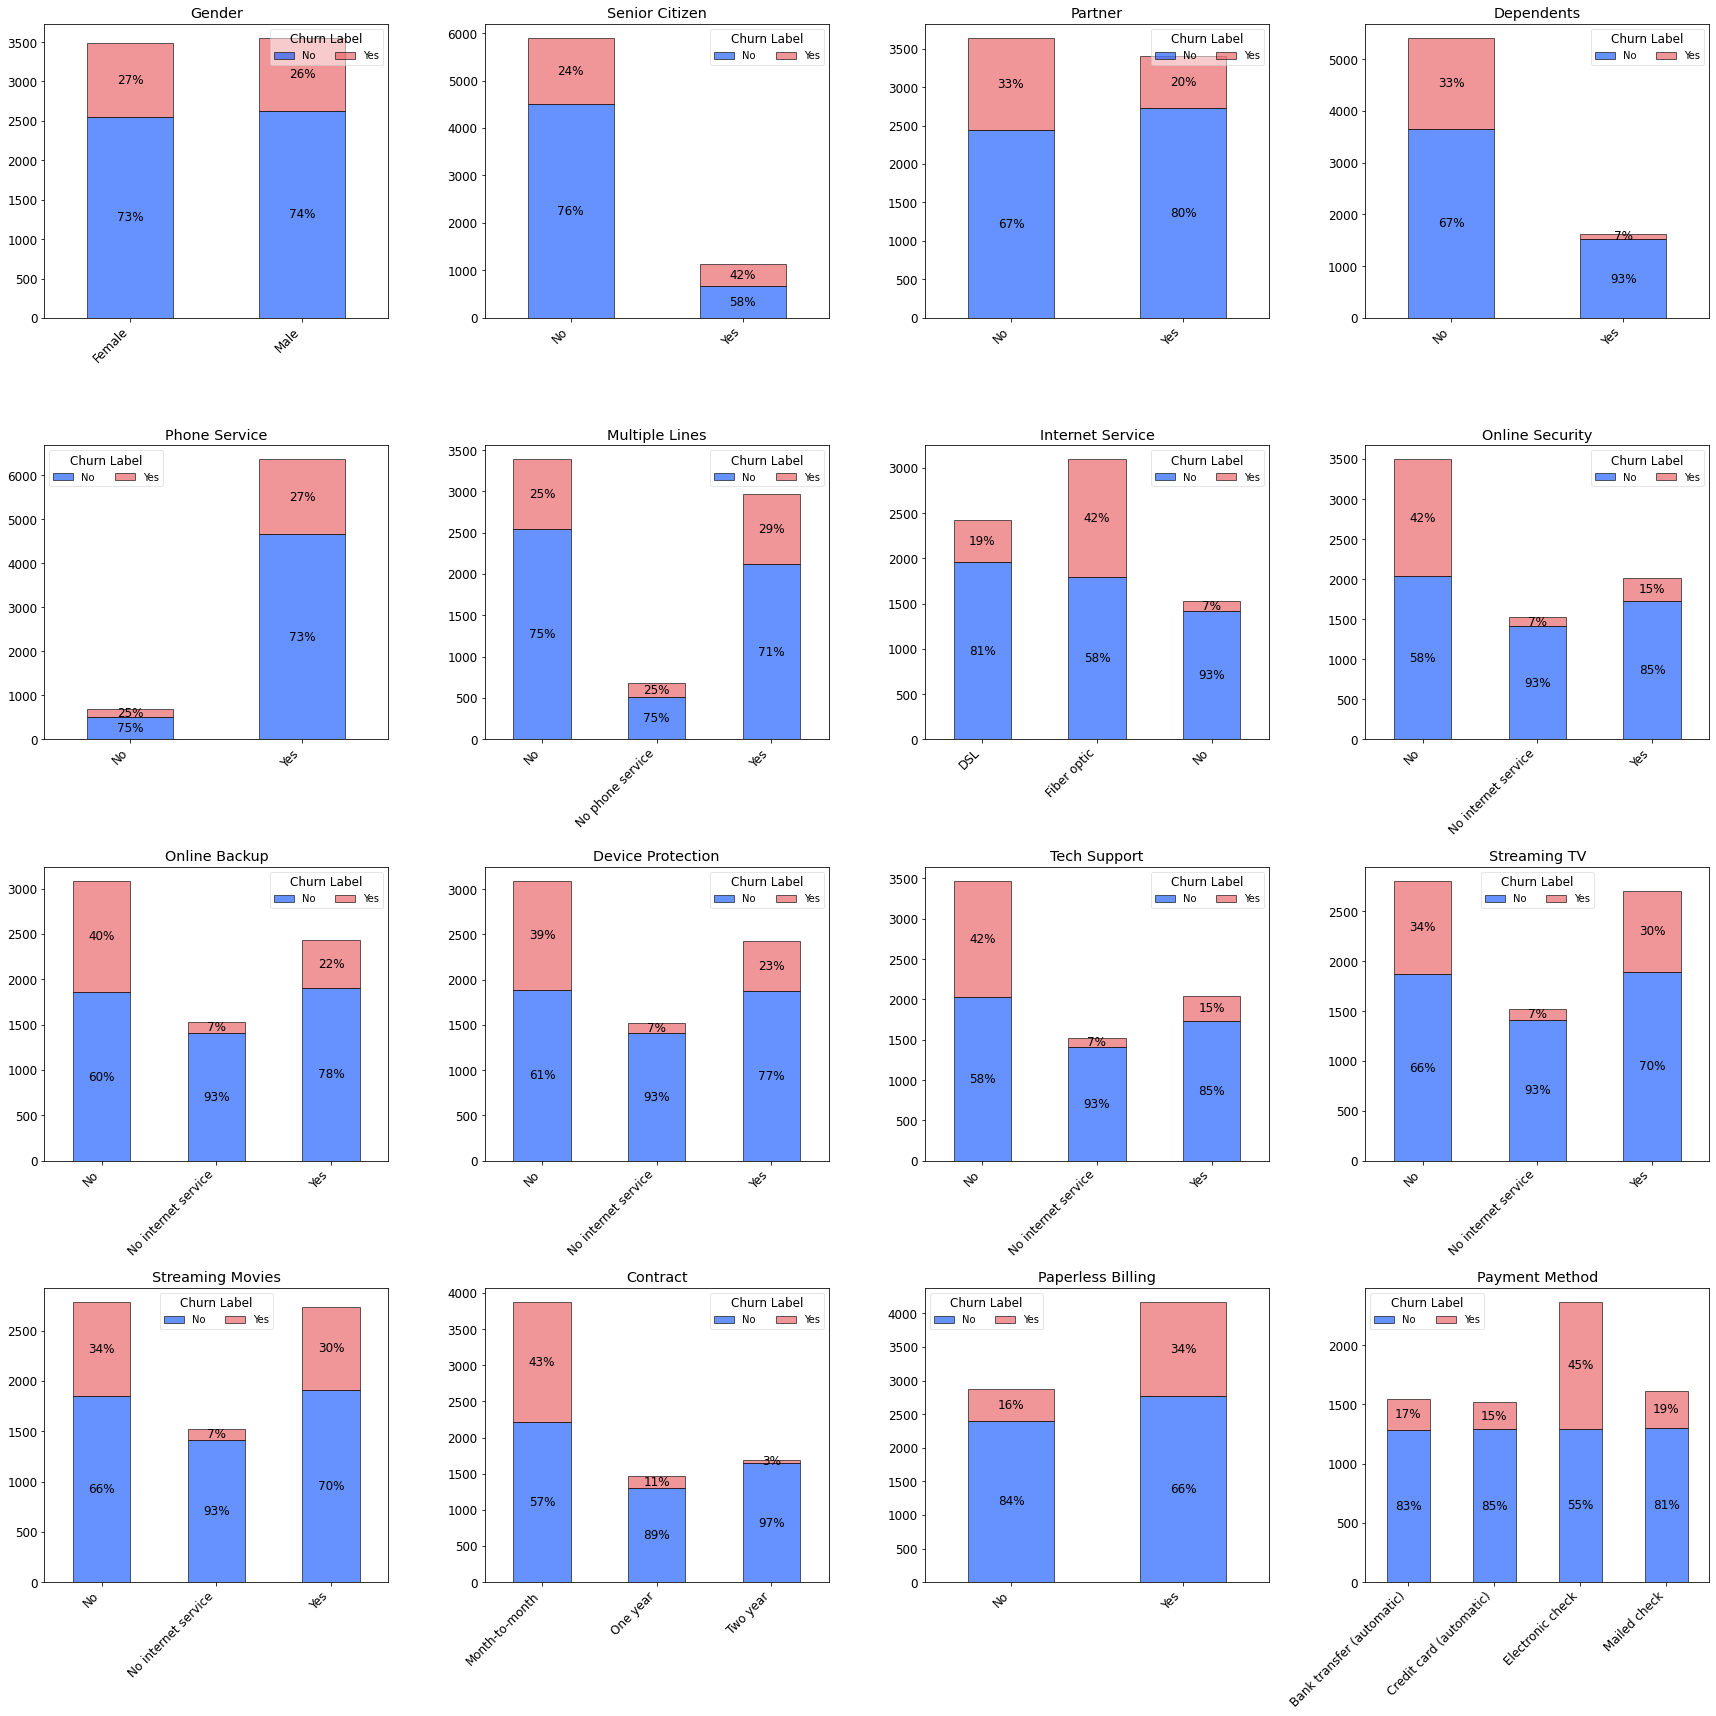

In [ ]:
#Seleccionamos las columnas que tienen entre 2 y 4 valores
min_uni = 2
max_uni = 4
gcol = []
for col in tcc.columns:
  if tcc[col].nunique() >= min_uni and tcc[col].nunique() <= max_uni and col not in ['Churn Value', 'Churn Label']:
    gcol.append(col)

#Definimos la cantidad de columnas en las que queremos ver los gráficos
numcol = 4

#Definimos paleta personalizada
azul='#0049ff'
rojo='#e64e53'
pal2=[azul, rojo]

#Graficamos las columnas antes seleccionadas diferenciando por la 'Churn label'
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(-(-len(gcol)//numcol), numcol, figsize=(24,24))
i=0
j=0
for col in gcol:
  #Calculando los valores para cada variable
  sc = tcc[['Churn Label', col]].value_counts().unstack(0)

  #Calculando los porcentajes de churn para cada categoría (en cada variable)
  sc_lab = tcc[['Churn Label', col]].value_counts().unstack(1)
  sc_lab_per = sc_lab/sc_lab.sum(axis=0)
  lab_arr = sc_lab_per.to_numpy()
  
  #Graficamos
  #ax[i,j].bar(sc.columns, sc)
  sc.plot(kind='bar', stacked=True, title=col, ax=ax[i,j], color=pal2, alpha=0.6, edgecolor='k')
  
  #Colocamos etiquetas de porcentajes
  for n, bar in enumerate(ax[i,j].containers):
    labels = []
    for m in range(sc.shape[0]):
      labels.append(f"{round(100*lab_arr[n][m])}%")
    ax[i,j].bar_label(bar, labels=labels, label_type='center')
    ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation=45, horizontalalignment='right')
    ax[i,j].set_xlabel(None)
    legend = ax[i,j].legend(title='Churn Label', fontsize='small', frameon=True, loc='best', ncol = 2, columnspacing=2, framealpha=0.5)
    #frame = legend.get_frame() #Estas 2 líneas sirven para luego de haber asignado a legend la leyenda poder manejar el frame que la contiene.
    #frame.set_edgecolor('k')
        
  #Incrementamos las coordenadas de posición en la grilla
  if j==numcol-1:
    j = 0
    i += 1
  else:
    j += 1
    
#Plotemos de manera tal que las leyendas no se superpongan con otro gráficos de la grilla
plt.tight_layout()
plt.show() 

#### Conclusiones

>**Senior Citizen** Un quinto de los clientes son jubilados y tiene un 42% de churn.<br>
>**Partner** Vivir con otras personas (no a cargo) genera un propensión al churn un 50% mayor que los que viven solos o con gente a cargo solamente.<br>
>**Dependents** Sólo un tercio vive con gente a cargo y tienen un churn de apenas 7%, 1 de cada de 3 personas que no tiene gente a cargo deja la compañía.<br>
>**Phone Service** Apenas un 15% de los clientes no tiene teléfono, no influye sustancialmente en el churn.<br>
>**Gender** no afecta el comportamiento del churn.<br>
>**Internet Service** El 80% de los clientes tiene servicio de internet, más de la mitad de esos fibra óptica y tiene un churn de 42%, más del doble de los que tienen ADSL.<br>
**Online Security** De los clientes que tienen internet, el 60% no tiene este servicio y tienen un churn de 42%, casi el triple que los que sí lo tienen.

#### Análisis Tenure Months

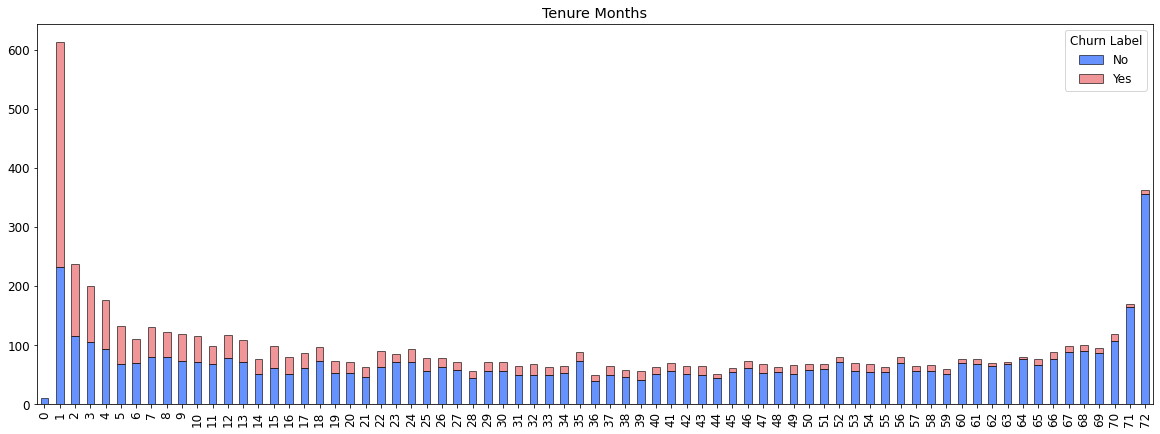

In [ ]:
ax = tcc[['Churn Label', 'Tenure Months']].value_counts().unstack(0).plot(kind='bar', figsize=(20,7), stacked=True, title='Tenure Months', color=pal2, alpha=0.6, edgecolor='k')
ax.set_xlabel(None)
plt.show()

In [ ]:
#Calculamos churn y porcentaje para un grupo específico de meses en la compañía
exact = 1
tm1ch = round(tcc[tcc['Tenure Months']==exact]['Churn Value'].mean(), 2)
tm1ra = round(tcc[tcc['Tenure Months']==exact].shape[0]/tcc.shape[0], 2)
print(f'El {round(tm1ra*100)}% de los clientes tiene {exact} mes/es de antiguedad y un {round(tm1ch*100)}% de churn.')

El 9% de los clientes tiene 1 mes/es de antiguedad y un 62% de churn.


In [ ]:
#Calculamos churn y porcentaje para un grupo de hasta x meses en la compañía
menoroigual = 5
tmh5ch = round(tcc[tcc['Tenure Months']<=menoroigual]['Churn Value'].mean(), 2)
tmh5ra = round(tcc[tcc['Tenure Months']<=menoroigual].shape[0]/tcc.shape[0], 2)
print(f'El {round(tmh5ra*100)}% de los clientes tiene {menoroigual} o menos meses de antiguedad y un {round(tmh5ch*100)}% de churn.')

El 19% de los clientes tiene 5 o menos meses de antiguedad y un 54% de churn.


#### Análisis Monthly Charges y Total Charges

In [ ]:
#Definimos una función para graficar barras apiladas, en una escala absoluta, pero con las etiquetas de los valores relativos de churn y no churn.
def customhist(col, num_bins):
  
  #Definimos ancho de columna dinámico para que la apariencia sea similar sin importar la escala de x
  width = (max(tcc[col])-min(tcc[col]))/ (2*num_bins)
  
  #Seleccionamos los registros de la columna input según el valor de churn
  val = tcc[col]
  val_yes = tcc[tcc['Churn Value']==1][col]
  val_no = tcc[tcc['Churn Value']==0][col]

  #Generamos los valores de los bins
  bins = np.linspace(min(val), np.percentile(val, 100-100/num_bins), num_bins)

  #Asignamos los valores a cada bin
  digitized_yes = np.digitize(val_yes, bins)
  digitized_no = np.digitize(val_no, bins)
  
  #Creamos figura
  fig, ax = plt.subplots(figsize=(12,6))
  
  #Inicializamos listas para contar elementos en cada bin
  d_y_c = []
  d_n_c = []

  #Contamos elementos en cada bin
  for i in range(num_bins):
    y = np.count_nonzero(digitized_yes == i+1)
    n = np.count_nonzero(digitized_no == i+1)
    d_y_c.append(y)
    d_n_c.append(n)

  #Calculamos total (por barra) y los porcentajes
  d_c= np.add(d_y_c, d_n_c)
  d_y_c_p = np.divide(d_y_c, d_c)
  d_n_c_p = np.divide(d_n_c, d_c)

  #Redondeamos valores de etiquetas
  xlabels = [round(x) for x in bins]

  #Graficamos barras inferiores y superiores
  bcn = ax.bar(x=bins, height=d_n_c, width=width, color=azul, alpha=0.6, edgecolor='k')
  bcy = ax.bar(x=bins, height=d_y_c, bottom=d_n_c, width=width, tick_label=xlabels, color=rojo, alpha=0.6, edgecolor='k')

  #Inicializamos lista de etiquetas de porcentajes  
  label_y = []
  label_n = []

  #Calculamos etiquetas de arriba (churn=Yes)
  for i in d_y_c_p:
    l_y = f"{round(100*i)}%"
    label_y.append(l_y)

  #Calculamos etiquetas de abajo (churn=No)
  for i in d_n_c_p:
    l_n = f"{round(100*i)}%"
    label_n.append(l_n)

  #Colocamos etiquetas, seteamos títulos y graficamos
  ax.bar_label(bcy, labels=label_y, label_type='center')
  ax.bar_label(bcn, labels=label_n, label_type='center')
  plt.title(col)
  plt.show()

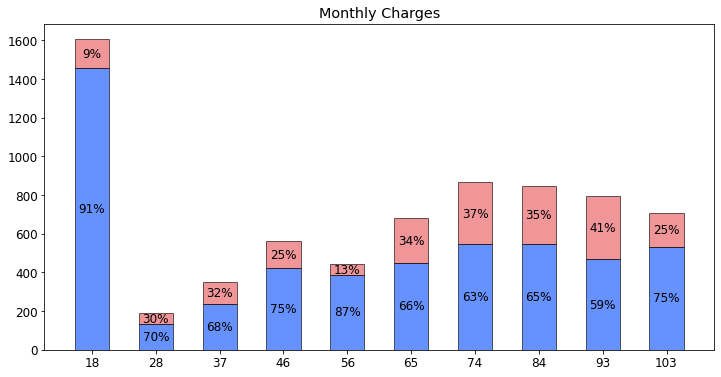

In [ ]:
customhist('Monthly Charges', 10)

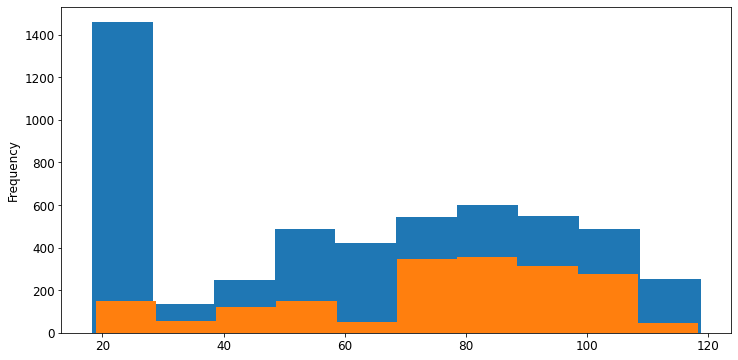

In [ ]:
#Esta sería la versión corta
mc = tcc.groupby('Churn Value')['Monthly Charges'].plot(kind='hist', figsize=(12,6))
plt.show()

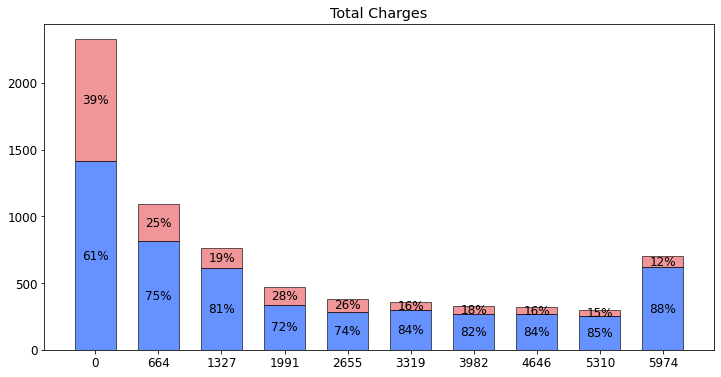

In [ ]:
customhist('Total Charges', 10)

Total charges pareciera que tiene el mismo comportamiento que tenure months, los comparamos.

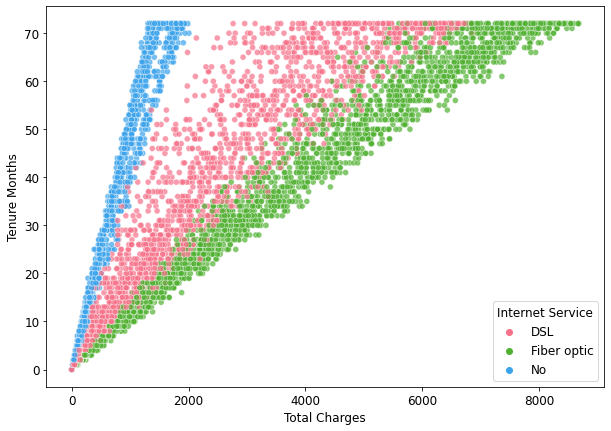

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tcc, x='Total Charges', y='Tenure Months', hue='Internet Service', palette='husl', alpha=0.7)
plt.show()

> Existe una relación lineal entre estas variables, claramente diferenciada por el tipo de de servicio de internet o si sólo tiene teléfono.

---

#### Análisis Churn Reason

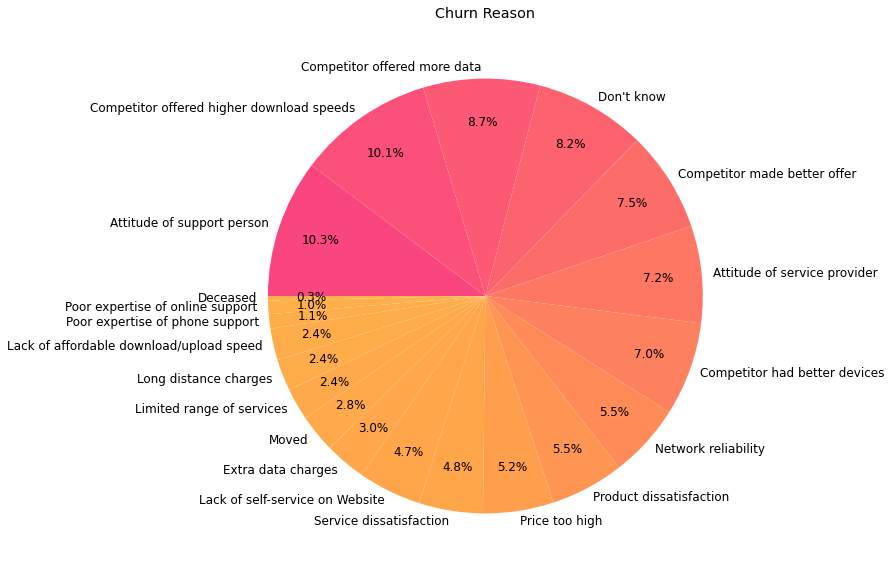

In [ ]:
#Definimos paleta personalizada
colors = sns.color_palette('blend:#fa467f,#ffa44a,#ffb14b', 20)

#Graficamos torta
tcc['Churn Reason'].value_counts().plot(kind='pie', figsize=(10,10), colors=colors, autopct='%1.1f%%', labeldistance=1.05, pctdistance=0.8, counterclock=False, startangle=-180)
plt.title('Churn Reason')
plt.ylabel(None)
plt.show()

In [ ]:
#Contamos que porcentaje de razones están vinculadas a motivo "Competidor"
print(round(tcc['Churn Reason'].str.contains('Competitor').value_counts(normalize=True)[True], 2)) #Competitor reason


0.33


In [ ]:
#Contamos que porcentaje de razones están vinculadas a motivo "Soporte/Actitud"
print(round(tcc['Churn Reason'].str.contains('support|Attitude').value_counts(normalize=True)[True], 2)) #Support or Attitude reason

0.2


#### Conclusiones

> La mitad de los motivos se engloban dentro de los tópicos: "Competidor" (33%), como vimos porque ofrece mejor servicio u oferta y por otro lado el Soporte y Actitud brindasos (20%).

---

#### Análisis Churn Score y CLTV

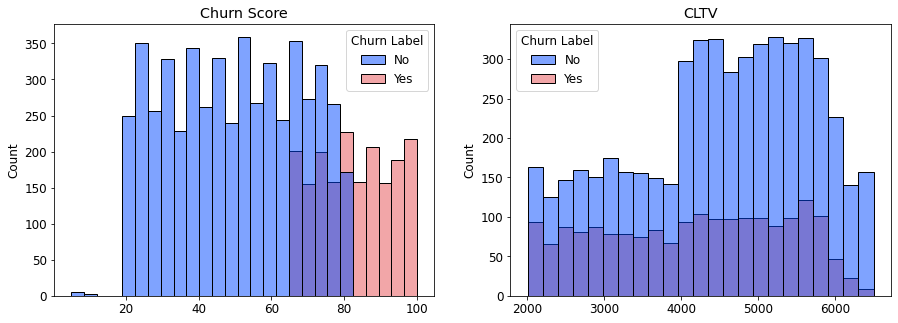

In [ ]:
#Graficamos respectivos histogramas
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(ax=ax[0], data=tcc, x='Churn Score', hue='Churn Label', hue_order=['No', 'Yes'], palette=pal2)
sns.histplot(ax=ax[1], data=tcc, x='CLTV', hue='Churn Label', hue_order=['No', 'Yes'], palette=pal2)
ax[0].set_title('Churn Score')
ax[0].set_xlabel(None)
ax[1].set_title('CLTV')
ax[1].set_xlabel(None)
plt.show()

In [ ]:
#Calculamos cuantos casos corresponden a personas que dieron la baja por deceso y cuantas por mudanza.
tcc[tcc['Churn Reason']=='Deceased'].shape[0], tcc[tcc['Churn Reason']=='Moved'].shape[0]

(6, 53)

#### Conclusiones Churn Score y CLTV?

>* EL Churn Score se distribuye llamativamente de manera uniforme para ambas etiquetas. Sorpresivamente todos los casos de churn por mudanza y deceso tienen un score mayor a 65. 
>* CLTV: para los clientes con churn la distribución es mayormente uniforme y en clientes que permanecen en la empresa existen 2 zonas de distribución uniforme, siendo la de rango superior (4000-6000) del doble de volumen que el resto.
---






#### Análisis datos geográficos

In [ ]:
#Agrupamos los datos por ciudad, promediando latitud y longitud y contando la cantidad de clientes
cities = tcc.groupby(by='City').agg(Lon_mean=('Longitude', np.mean), Lat_mean=('Latitude', np.mean), Chu_mean=('Churn Value', np.mean), Count=('Longitude', np.count_nonzero))

#Definimos umbral para seleccionar ciudades con más de x clientes y filtramos los datos previamente agrupados
threshold = 0
cithresh = cities[cities['Count']>threshold]

#Graficamos
fig = px.scatter_mapbox(cithresh, lat="Lat_mean", lon="Lon_mean", color='Chu_mean', color_continuous_scale="Jet", size='Count', size_max=30, zoom=10, mapbox_style="carto-positron", opacity=1, height=700)
fig.update_layout(margin=dict(l=20, r=20, t=40, b=40), mapbox={'zoom': 4.5})
fig.show()

# Construimos un modelo predictivo de Churn: XGB

#### Buscando patrones en customer ID

In [ ]:
#Creamos un dataframe auxiliar para inspeccionar
num_let = pd.DataFrame()
num_let[['CustomerID_num', 'CustomerID_let']] = tcc['CustomerID'].str.split('-', 1, expand=True)
num_let['Churn Value']=tcc['Churn Value']
num_let.head()

,CustomerID_num,CustomerID_let,Churn Value
0,3668,QPYBK,1
1,9237,HQITU,1
2,9305,CDSKC,1
3,7892,POOKP,1
4,0280,XJGEX,1


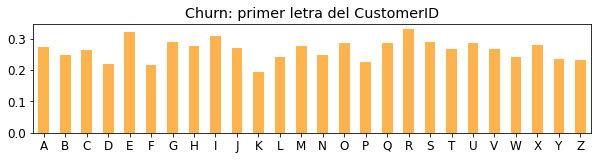

In [ ]:
#Buscamos patrones con la primer letra
num_let['CustomerID_let_first'] = num_let['CustomerID_let'].astype(str).str[0]
ax = num_let.groupby(['CustomerID_let_first']).mean().plot(kind='bar', figsize=(10,2), color=(1,0.7,0.3), title='Churn: primer letra del CustomerID')
ax.set_xlabel(None)
ax.get_legend().remove()
plt.xticks(rotation=0)
plt.show()

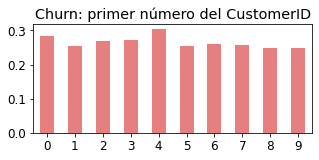

In [ ]:
#Buscamos patrones con el primer número
num_let['CustomerID_num_first'] = num_let['CustomerID_num'].astype(str).str[0]
ax = num_let.groupby(['CustomerID_num_first']).mean().plot(kind='bar', figsize=(5,2), color=(0.9,0.5,0.5), title='Churn: primer número del CustomerID')
ax.set_xlabel(None)
ax.get_legend().remove()
plt.xticks(rotation=0)
plt.show()

#### Conclusiones

>No detectamos patrones en el CustomerID, eliminaremos esta columna del input de datos del modelo.

---

## Modelo 1: XGBoost Classifier default

#### Preparamos datos para entrenar el modelo

Para todos los modelos eliminamos:
>*   **'CustomerID'**: no encontramos patrones en los números ni letras. 
>*   **'Count'**: todos los registros son iguales.
>*   **'Lat Long'**: contiene los mismos valores que 'Latitude' y 'Longitude' pero concatenados.
>*   **'Country'** y **'State'**: los datos corresponden únicamente al estado de California, Estados Unidos.
>*   **'Churn Label'** y **'Churn Value'**: 'Churn Value' pertenece a las etiquetas "y", Churn Label es redundante.
>*   **'Churn Score'**: Esto es parte de una predicción anterior y lo usaremos sólo para encontrar una referencia de resultados.
>*   **'Churn Reason'**: Texto vinculado a los casos con churn positivo.
>*   **'CLTV'**: Esta variable también es una predicción previa.
>*   **'Total Charges'**: Como vimos presenta una correlación fuerte con Tenure Months.


In [ ]:
#Definimos semilla
seed=42

#Asignamos serie de etiquetas
y = tcc['Churn Value'].copy()

#Asignamos a un nuevo dataframe el dataset original sin las columnas comentadas
tccd = tcc.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long', 'Churn Label', 'Churn Value', 'Churn Score', 'Churn Reason', 'Total Charges'], axis=1)
X_pre = tccd.copy()
print(X_pre.shape)
X_pre.columns

(7043, 23)


Index(['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'CLTV'],
      dtype='object')

In [ ]:
#Convertimos variables categóricas a nuevas variables binarias.
X = pd.get_dummies(X_pre)
print(X.shape, y.shape, X.columns)

#Dividimos los datos en set de entrenamiento y de prueba
X_train_CLTV, X_test_CLTV, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)
X_train = X_train_CLTV.drop(['CLTV'], axis=1)
X_test = X_test_CLTV.drop(['CLTV'], axis=1)

(7043, 1178) (7043,) Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'CLTV', 'City_Acampo', 'City_Acton', 'City_Adelanto', 'City_Adin',
       ...
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Paperless Billing_No', 'Paperless Billing_Yes',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object', length=1178)


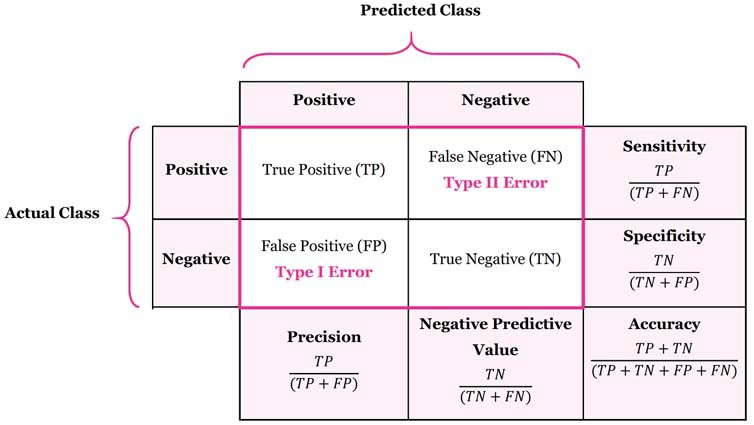

In [ ]:
#Definimos función para calcular las métricas relevantes para cada modelo que construyamos
def met_gra(y_test, y_pred_test, y_train, y_pred_train, ret=True): 
  
  #Seteamos decimales para el redondeo
  deci = 2
  
  #Calculamos F1 para train y test para monitorear el overfiting
  train_f1 = f1_score(y_train, y_pred_train)
  test_f1 = f1_score(y_test, y_pred_test)
  
  #Calculamos las métricas relevantes del problema e imprimimos resultados
  rs = recall_score(y_test, y_pred_test)
  ps = precision_score(y_test, y_pred_test)
  print('test/train F1= '+round(test_f1/train_f1, deci).astype(str),
        'recall = '+round(rs, deci).astype(str),
        'precision = '+round(ps, deci).astype(str), sep='\n')
  
  #Graficamos matriz de confusión y matrix PR
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize='all', labels=[1, 0], colorbar=False, cmap='BuPu', ax=ax[0])
  PrecisionRecallDisplay.from_predictions(y_test, y_pred_test, ax=ax[1])
  plt.legend(loc='best')
  plt.show()
  
  #Devolvemos los valores en caso que se especifique lo contrario en el llamado
  if ret:
    return round(rs, 2), round(ps, 2), round(test_f1, 2)

test/train F1= 0.89
recall = 0.53
precision = 0.66


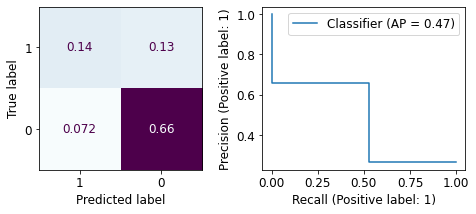

Tiempo de ejecución: 26 segundos


In [ ]:
#Para monitorear el tiempo de ejecución definimos tiempo de comienzo
start = time.time()

#Instanciamos clasificados XGBoost
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', seed=seed)

#Entrenamos el modelo
xgb_clf.fit(X_train, y_train)

#Calculamos predicciones del modelo sobre el test de entrenamiento y de pruebas
y_pred_test = xgb_clf.predict(X_test)
y_pred_train = xgb_clf.predict(X_train)
end = time.time()

#Monitoreamos tiempo transcurrido
elapsed_1 = end - start

#Calculamos y mostramos métricas, guardamos f1 score para comparar performance con el siguiente modelo
_, _, f1_1 = met_gra(y_test, y_pred_test, y_train, y_pred_train)

#Mostramos el tiempo de ejecución
print(f'Tiempo de ejecución: {round(elapsed_1)} segundos')

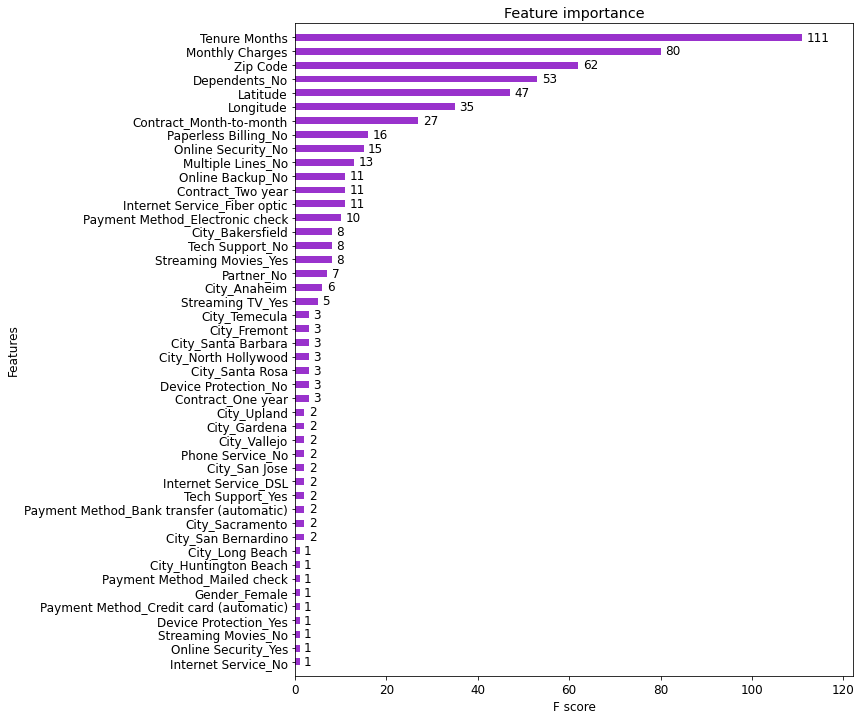

In [ ]:
#Plotemos la lista de atributos y su importancia relativa
fig, ax = plt.subplots(figsize=(10,12))
xgb.plot_importance(xgb_clf, ax=ax, height=0.5, color='darkorchid')
plt.grid(False)
plt.show()

Saquemos algunos datos adicionales haciéndolo más económico para el cálculo computacional. Principalmente "City" genera 1128 columnas adicionales al dataset qque podemos ahorrar y recolectar desde "Latitude" y "Longitude". En este caso "ZIP Code" aunque no es categórico es ordinal y puede dar una incorrecta idea de orden como input.

In [ ]:
seed=16
y = tcc['Churn Value'].copy()
X_pre = tccd.drop(['City', 'Zip Code'], axis=1)
print(X_pre.shape)
X_pre.columns

(7043, 21)


Index(['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'CLTV'],
      dtype='object')

In [ ]:
X = pd.get_dummies(X_pre)
print(X.shape, y.shape, X.columns)

(7043, 48) (7043,) Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'CLTV',
       'Gender_Female', 'Gender_Male', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service'

test/train F1= 0.93
recall = 0.57
precision = 0.65


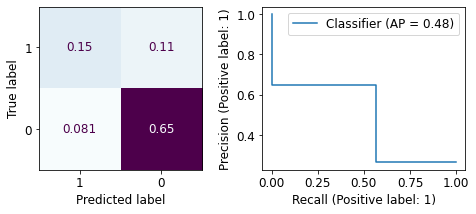

Tiempo de ejecución: 1 segundos
El tiempo de ejecución se redujo un 97%
La performance (F1) aumentó un 3%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)
start = time.time()
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', seed=seed)
xgb_clf.fit(X_train, y_train)
y_pred_test = xgb_clf.predict(X_test)
y_pred_train = xgb_clf.predict(X_train)
end = time.time()
elapsed_2 = end - start
_, _, f1_2 = met_gra(y_test, y_pred_test, y_train, y_pred_train)
print(f'Tiempo de ejecución: {round(elapsed_2)} segundos')
print(f'El tiempo de ejecución se redujo un {round((1-(elapsed_2/elapsed_1))*100)}%')
print(f'La performance (F1) aumentó un {round(-(1-(f1_2/f1_1))*100)}%')

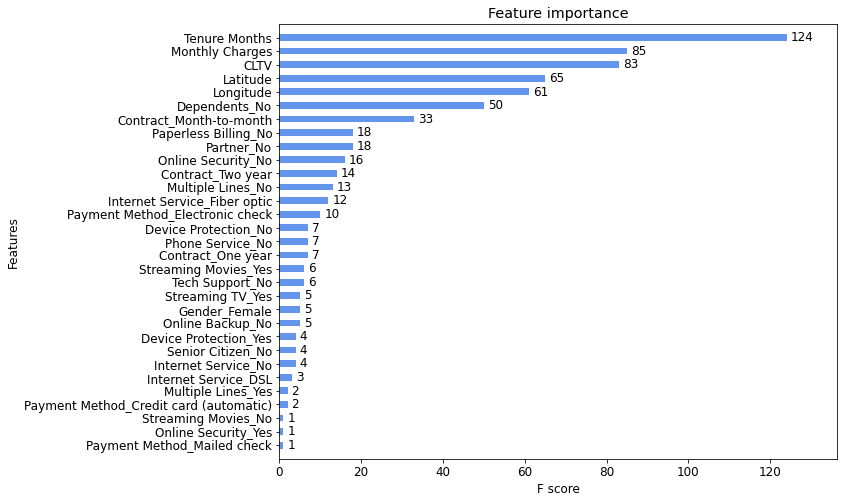

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(xgb_clf, ax=ax, height=0.5, color='cornflowerblue')
plt.grid(False)
plt.show()

##Probemos parámetros y métricas de scoring

Evaluation: aucpr  - Scoring metric: balanced_accuracy
{'subsample': 1, 'scale_pos_weight': 3, 'max_depth': 3, 'eval_metric': 'aucpr', 'eta': 0.01}
test/train F1= 0.95
recall = 0.85
precision = 0.52


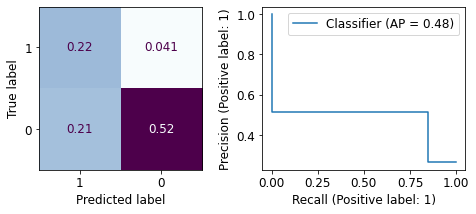



Evaluation: aucpr  - Scoring metric: precision
{'subsample': 0.3, 'scale_pos_weight': 2, 'max_depth': 8, 'eval_metric': 'aucpr', 'eta': 0.03}
test/train F1= 0.69
recall = 0.66
precision = 0.58


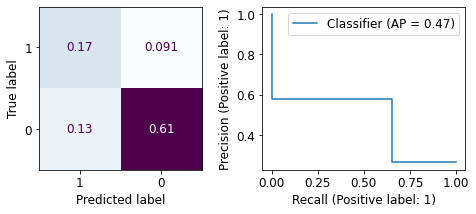



Evaluation: aucpr  - Scoring metric: recall
{'subsample': 1, 'scale_pos_weight': 3, 'max_depth': 3, 'eval_metric': 'aucpr', 'eta': 0.01}
test/train F1= 0.95
recall = 0.85
precision = 0.52


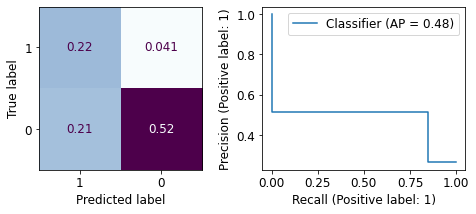



Evaluation: aucpr  - Scoring metric: f1
{'subsample': 1, 'scale_pos_weight': 2, 'max_depth': 3, 'eval_metric': 'aucpr', 'eta': 0.3}
test/train F1= 0.94
recall = 0.75
precision = 0.57


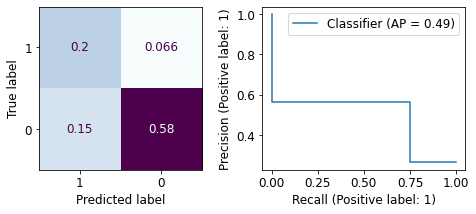



Evaluation: aucpr  - Scoring metric: average_precision
{'subsample': 1, 'scale_pos_weight': 2, 'max_depth': 3, 'eval_metric': 'aucpr', 'eta': 0.3}
test/train F1= 0.94
recall = 0.75
precision = 0.57


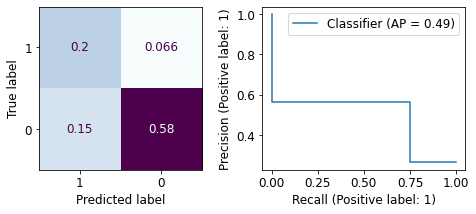



Elapsed: 7 minutes



In [ ]:
#Definimos métricas que vamos a testear en el RSCV
metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'average_precision']

#Definimos métricas de evaluación interna de XGB (Habíamos incluído 'auc' también pero terminaban convergiendo a valores similares de precision y recall)
eval_metrics = ['aucpr']

#Definimos hyperparámetros para testear
eta = [0.01, 0.03, 0.1, 0.3]
max_depth = [3, 5, 8, 10]
subsample = [0.3, 0.5, 0.8, 1]
spw = [2, 3]

#Definimos porcentaje de pruebas en relación a las combinaciones posibles
random_ratio = 0.1

#Definimos cantidad de iteraciones del RSCV
n_iter = len(eta) * len(max_depth) * len(subsample) * len(spw) * random_ratio 

#Creamos y preparamos dataframe para guardar y comparar métricas de cada modelo testeado
models = pd.DataFrame()
models['metrics'] = []
models['recall'] = []
models['precision'] = []
models['bestimator'] = []
models['test_predictions'] = []
start = time.time()
for em in eval_metrics:
  for m in metrics:
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', seed=seed)
    param_distributions = {'eta': eta,  
                           'max_depth': max_depth,                              
                           'subsample': subsample,
                           'scale_pos_weight': spw,                        
                           'eval_metric': [em]}
    
    
    xgb_gscv = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_distributions, scoring=m, cv=5, n_jobs=-1, random_state=seed, n_iter=n_iter)
    
    xgb_gscv.fit(X_train, y_train)
    
    y_pred_test = xgb_gscv.best_estimator_.predict(X_test)
    y_pred_train = xgb_gscv.best_estimator_.predict(X_train)
    
    print('Evaluation:', em, ' - Scoring metric:', m)
    print(xgb_gscv.best_params_)
    rs, ps, _= met_gra(y_test, y_pred_test, y_train, y_pred_train)
    
    models = models.append({'metrics': em+'-'+m, 'recall': rs, 'precision': ps, 'bestimator': xgb_gscv.best_estimator_, 'test_predictions': y_pred_test}, ignore_index=True)
    print('\n')

end = time.time()
elapsed = end - start
print(f'Elapsed: {round(elapsed/60)} minutes\n')

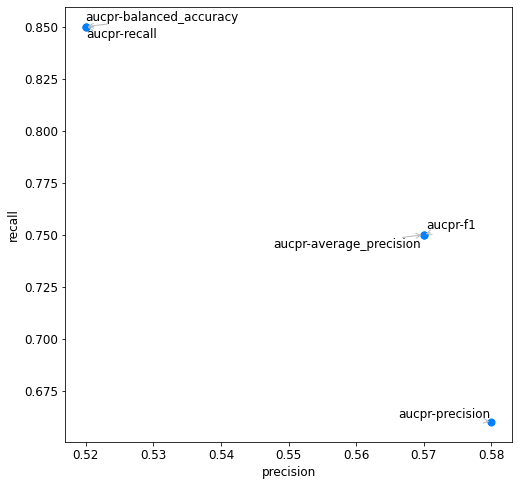

,metrics,recall,precision,bestimator,test_predictions
0,aucpr-balanced_accuracy,0.85,0.52,"XGBClassifier(eta=0.01, eval_metric='aucpr', s...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
2,aucpr-recall,0.85,0.52,"XGBClassifier(eta=0.01, eval_metric='aucpr', s...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
3,aucpr-f1,0.75,0.57,"XGBClassifier(eta=0.3, eval_metric='aucpr', sc...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
4,aucpr-average_precision,0.75,0.57,"XGBClassifier(eta=0.3, eval_metric='aucpr', sc...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
1,aucpr-precision,0.66,0.58,"XGBClassifier(eta=0.03, eval_metric='aucpr', m...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."


In [ ]:
models.plot(kind='scatter', x='precision', y='recall', figsize=(8,8), c='#0080ff', s=50)
texts = [plt.text(models['precision'][i], models['recall'][i], models['metrics'][i]) for i in range(models.shape[0])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#bababa'), force_text=(0.3,0.6))
plt.show()
modelord =  models.sort_values(by=['recall', 'precision'], ascending=False)
display(modelord)

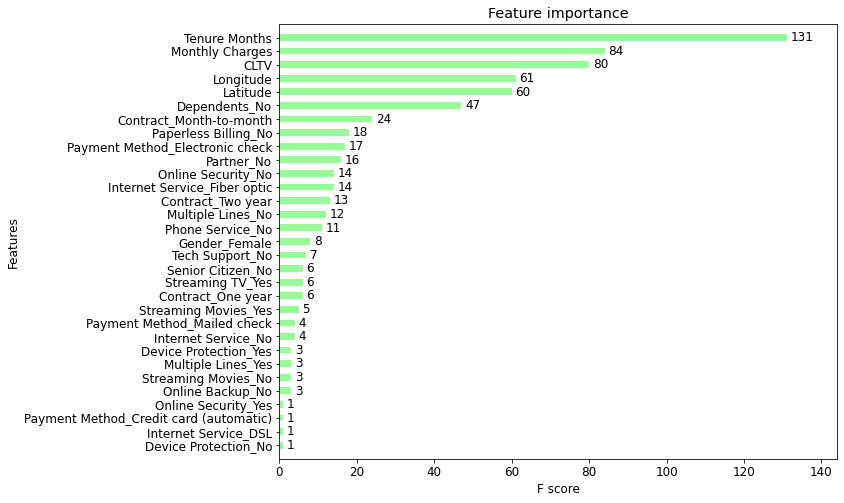

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(modelord['bestimator'][0], ax=ax, height=0.5, color='palegreen')
plt.grid(False)
plt.show()

#### Conclusiones

> En función al tipo de acciones que se quieran implementar para mitigar el churn sugerimos usar los modelos de la siguiente manera:<br>
>*   Si se intenta alcanzar a la mayor cantidad de clientes con propensión a la baja con una acción masiva, por ejemplo una promoción comercial recomendamos usar el modelo **aucpr-recall**. Esto permitirá alcanzar hasta un **<font color='#229c57'>85%</font>** de los clientes con intención de baja al costo de estar brindado la misma a un **<font color='#1a97bd'>48%</font>** de clientes que de todas maneras iban a seguir en la compañia.
>*   Si se intenta alcanzar a los clientes con propensión a la baja con una acción costosa o personalizada, por ejemplo soporte técnico bonificado por ciertos meses recomendamos usar el modelo **aucpr-precision**. Esto permitirá mejorar la relación de clientes alcanzados que no pensaban irse de la compañia desde un 48% hasta un **<font color='#1a97bd'>42%</font>**. A la inversa que el caso anterior el costo aquí es que sólo estaremos alcanzando al **<font color='#229c57'>66%</font>** de los clientes que tienen intención de baja.
>*   En un punto intermedio tenemos el modelo **aucpr-f1** que permitirá capturar el **<font color='#229c57'>75%</font>** de los clientes con intención de baja, con una desperdicio del  **<font color='#1a97bd'>43%</font>** de los casos.<br>
>
> En caso que se implemente algúna acción secuencial, por ejemplo una campaña de Call-OUT de Tech Support sugerimos (por definición) que se utilice la variable "CLTV" para priorizar el orden. 
> Dado que observamos que para el rango más alto de 'CLTV' la proporción de Churn es más baja podría resultar que una campaña incompleta ofrezca resultados (en cantidad) menos favorables que los esperados.




Simulemos Recall acumulado si ordenamos las predicciones de churn positivas por "CLTV" para el modelo **aucpr-recall**:

In [ ]:
test_predictions = models[models['metrics']=='aucpr-recall']['test_predictions'].values[0]
CLTV_labels = np.array(X_test['CLTV'].values)
seq_action_df = pd.DataFrame({'CLTV_labels': CLTV_labels, 'test_predictions': test_predictions, 'Churn Value': y_test})
seq_action_list_simulation = seq_action_df[seq_action_df['test_predictions']==1].sort_values('CLTV_labels', ascending=False)
seq_action_list_simulation.head()

,CLTV_labels,test_predictions,Churn Value
6693,6298,1,0
4178,6259,1,0
3851,6247,1,0
2914,6213,1,0
868,6204,1,1


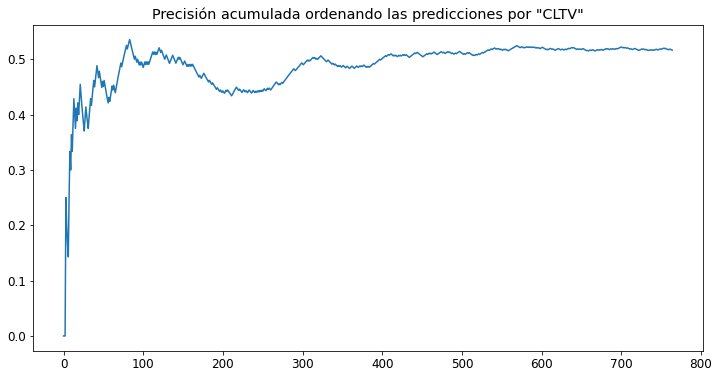

In [ ]:
tpcs = np.cumsum(seq_action_list_simulation['test_predictions'])
cvcs = np.cumsum(seq_action_list_simulation['Churn Value'].values)
cum_mean_rec_rat = []
for i in range(cvcs.shape[0]):
  if i!=0:
    cum_mean_rec_rat.append(cvcs[i]/i)
    final = np.array(cum_mean_rec_rat)
plt.figure(figsize=(12,6))
plt.plot(final)
plt.title('Precisión acumulada ordenando las predicciones por "CLTV"')
plt.show()